In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

We'll start with a standard application of Monte Carlo methods: estimating the value of $\pi$.

# Estimating $\pi$

The area of a circle is given by $A = \pi r^2$. The area of a square that circumscribes the circle is given by $4r^2$. The ratio of the area of the circle to the area of the square is $\pi/4$.

If we randomly select $N$ points in the square, the fraction of points that fall inside the circle will be equal to the ratio of the area of the circle to the area of the square. We can use this fact to estimate the value of $\pi$.

## Q.1

Generate $N = 100$ points in the unit square using `np.random.uniform`. Calculate the ratio of the number of points that fall inside the unit circle to the total number of points. Use this ratio to estimate the value of $\pi$.

Estimated value of pi: 3.12


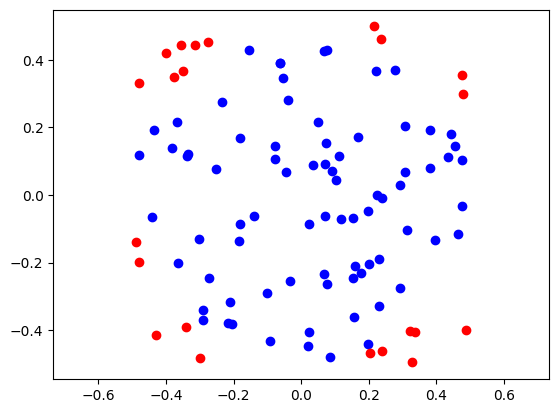

In [8]:
def estimate_pi(N):
  circle_count = 0
  plt.axis('equal')
  for i in range(N):
    x = np.random.uniform(-0.5, 0.5)
    y = np.random.uniform(-0.5, 0.5)
    if x**2 + y**2 <= 0.25:
      plt.plot(x, y, 'bo')
      circle_count += 1
    else:
      plt.plot(x, y, 'ro')
  estimate = circle_count / N * 4
  return estimate 

pi = estimate_pi(N = 100)

print("Estimated value of pi:", pi)

The above method produces a single estimate. It is never a good idea to rely on a single estimate. 

1. We should repeat the experiment multiple times to get a distribution of estimates.
2. We should also report the uncertainty in our estimate.

For now, we will use standard deviation as a measure of uncertainty. Later on we will learn about confidence intervals.

## Q.2

Generate $M = 100$ estimates of $\pi$ using the above method. Calculate the mean and standard deviation of the estimates.

Estimated value of pi: 3.1239999999999997
Uncertainty in the value of pi: 0.16044936896105264


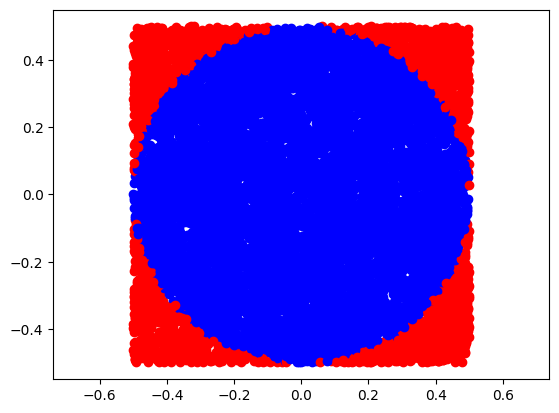

In [9]:
def multiple_estimates (N, M):
  samples = np.zeros(M)
  for i in range(M):
    samples[i] = estimate_pi(N)
    mean = np.mean(samples)
    std = np.std(samples)
  return mean, std 

mean, std = multiple_estimates (N = 100, M = 100)

print("Estimated value of pi:", mean)
print("Uncertainty in the value of pi:", std)

## Q.3

Reduction of variance i.e. uncertainty is a very important aspect of Monte Carlo methods. If your samples have a high variance, then you need a lot of samples to get a reliable estimate (more on this later).

Without doing any calculations, what do you think would reduce the uncertainty in the estimate of $\pi$?

1. Increase $N$.
2. Increase $M$.
3. Both 
4. Neither

Provide an answer based on your intuitive understanding of probability. You won't lose points for being wrong. 

## Answer to Q.3:
Increase $N$. As $N \rightarrow \infty$, the randomness converges to an ideal uniform distriution, resulting in greater accuracy in our approximation for the area of the circle. The law of large numbers states that the estimate converges to the true value as $N$ becomes unboundedly large, so we will have less uncertainty in the estiate for $\pi$.

I suspect increasing $M$ also reduces uncertainty (variance) by averaging the M estimates for $\pi$, causing our final estimate to trend towards the true value by the law of large numbers. However, this part is more ambiguous to me.

## Q.4 

Calculate standard deviations for 

1. $N = 100$ and $M = 100$
1. $N = 500$ and $M = 100$
2. $N = 100$ and $M = 500$

What do you observe? Was your intuition correct?

Uncertainty in the value of pi for N = 100, M = 100: 0.16240985191791782
Uncertainty in the value of pi for N = 500, M = 100: 0.07431285218587699
Uncertainty in the value of pi for N = 100, M = 500: 0.16771511082785592


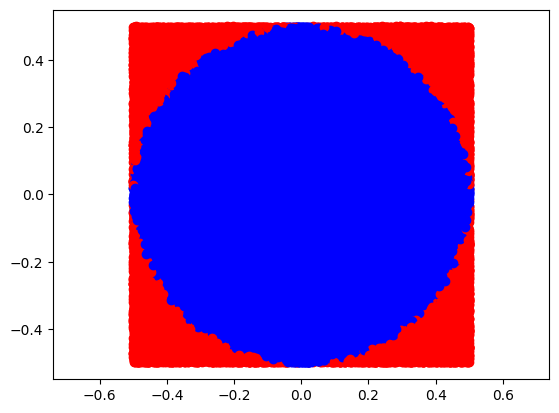

In [10]:
# Answer to Q.4:
_, std_1 = multiple_estimates (N = 100, M = 100)
_, std_2 = multiple_estimates (N = 500, M = 100)
_, std_3 = multiple_estimates (N = 100, M = 500)
print("Uncertainty in the value of pi for N = 100, M = 100:", std_1)
print("Uncertainty in the value of pi for N = 500, M = 100:", std_2)
print("Uncertainty in the value of pi for N = 100, M = 500:", std_3)

Increasing $N$ did reduce the standard deviation, but increasing $M$ did not have a significant effect. My intuition for $N$ was correct, but not entirely accurate for $M$.

## Q.5

Rephrase the above problem as finding the expectation of some random variable $X_N$. (Hint: $X_N$ is an average of $N$ random variables.)

You are welcome to write your answer on paper and attach a screenshot. However, this is your chance to learn LaTeX (if you haven't already). Try and write your answer using LaTeX in the cell below.

## Answer to Q.5:

Your answer here.

$$ X_{N}^* = \sum_{i=1}^{N} X_{i} $$

$$
X_{i} = 
\begin{cases} 
    1 & \text{if point is inside circle} \\
    0 & \text{otherwise}
\end{cases}
\sim Ber(p=\pi/4)
$$

$$ X_N^* \sim Normal(\mu, \sigma^2) $$

$$ \mu^* = \mathbb{E}[X_{N}^*] = \frac{\pi}{4} $$
$$ \sigma^{2*} = \frac{p(1-p)}{N} = \frac{\frac{\pi}{4}(1-\frac{\pi}{4})}{N} $$

$$ X_N = 4X_N^* $$
$$ \pi = 4\mathbb{E}[X_{N}^*] = \mathbb{E}[X_N] $$

## Q.6

Compute the mean $\mu$ and standard deviation $\sigma$ of the random variable $X_N$. Find the value of $N$ such that $\sigma < 0.01$.


## Answer to Q.6:

$$ \mu = \mathbb{E}[X_{N}] = \mathbb{E}[4X_{N}^*] = 4\mathbb{E}[X_{N}^*] = \pi $$
$$ \sigma^2 = \mathbb{V}[X_N] = \mathbb{V}[4X_N^*] = 16\mathbb{V}[X_N^*] $$
$$ \sigma = 4\sqrt{\mathbb{V}[X_N^*]} = 4\sqrt{\frac{\frac{\pi}{4}(1-\frac{\pi}{4})}{N}} $$

In [11]:
sig = 0.01
N = (4 / sig) ** 2 * (pi / 4) * (1 - pi / 4)
print(N)

27455.999999999996


$$ N \geq 27456 $$

## Q.7


Use the value of $N$ you found in Q.6 to estimate the value of $\pi$ "correct to two decimal places". Remember to generate multiple estimates of $\pi$ to get a distribution of estimates. Calculate the mean and standard deviation of the estimates.

If you run this multiple times, you'll find that your estimate of $\pi$ is not always correct to two decimal places. What is going on?

3.142584498834499 0.009693660078949756


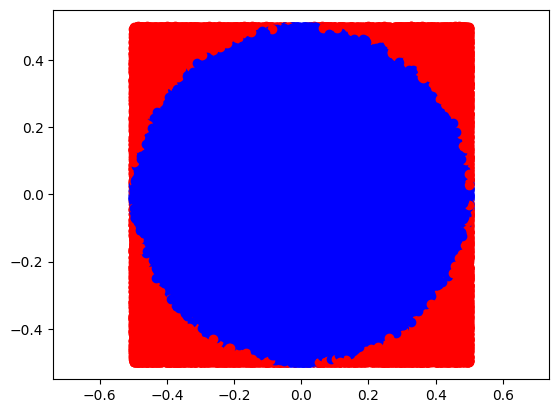

In [12]:
# Answer to Q.7:

N_crit = 27456
mean, std = multiple_estimates(N=N_crit, M=10)
print(mean, std)

# run 1: 3.1435314685314686 0.011554380544676189
# run 2: 3.1405011655011656 0.005692342771780151
# run 3: 3.1351398601398603 0.008949586264159894
# run 4: 3.1422348484848484 0.008354408469395093


We run this code segment with a pseudorandom seed, so we will get different estimates for $\pi$ each time. Even though $\sigma < 0.01$, this does not guarentee that all estimates will be accurate to two decimal places, but instead claims a reasonably high probability. Getting a $\hat{\pi}$ outside of this range is unlikely, but still possible as demonstrated above.

## Q.8 

Now consider the deterministic method of calculating $\pi$: measuring the circumference of a circle and dividing it by its diameter. 

1. What are the benefits of this method over the Monte Carlo method?
2. What are the benefits of the Monte Carlo method over this method?

## Answer to Q.8:

1. The deterministic method requires fewer compute resources than a Monte Carlo simulation, and provides a reasonably consistent estimate over multiple trials, assuming the same tool is used to make measurements. However, there will always be errors in measurement and it becomes very difficult to estimate $\pi$ to any more than two decimal places.
2. The Monte Carlo method provides a higher level of precision (lower uncertainty) in the estimate for $\pi$ with sufficient compute power. In addition, the process can be easily configured with different parameters and automated with greater efficiency.

## Final remarks 

You'll notice that your uncertainty in the estimate of $\pi$ only decreases as $\sqrt{N}$. This means that if you want to compute $\pi$ to a higher precision, say 3 more decimal places, you'll need 10^6 times more samples. It might be feasible for estimating $\pi$, but for more complex problems, this level of improvement might be computationally infeasible. We'll see many methods to reduce the variance of Monte Carlo estimates in the future that rely on clever mathematical tricks, the most important of which is importance sampling (no pun intended).